# 2. Random Sample Imputation

In [10]:
import pandas as pd
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head(100)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
95,0,NaN,8.0500
96,0,71.0,34.6542
97,1,23.0,63.3583
98,1,34.0,23.0000


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df['Age'].isnull().sum()

177

In [6]:
# Drop all the null value(only dropna)
# Also picking up a random sample value(sample)
df['Age'].dropna().sample() # Only one value we are getting from the data set non null value

172    1.0
Name: Age, dtype: float64

In [7]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
# put the non null value in the null value randomly
# Random state:- all the nan value will get replaced
# we donot want nan value
# It is replacing all the nan value with the sampled value
# these are the value that  are present in the table , just in a random order

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0).count()

177

In [11]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [12]:
median=df.Age.median() # To deal with outliers
median

28.0

In [22]:
# Replace the nan value with random sampling
# variable is feature(Age)
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)# new column will be created , all the nan  value will be replaced by median value
    df[variable+"_random"]=df[variable] # It will create another feature and copy the age feature
    # It will have the random sample to fill the nan value
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0) # null value will get replace by random value
    
    ## Pandas need to have same index in order to merge the dataset( merge random_sample back to [variable+"_random"])
    random_sample.index=df[df[variable].isnull()].index # null value index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample # Where ever the data will be null along with the feature(variable+'_random') just replace with random_sample

In [20]:
impute_nan(df,'Age',median)

In [21]:
df.head(100) # Age_random is created with random sample imputaion

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
95,0,NaN,8.0500,28.0,40.0
96,0,71.0,34.6542,71.0,71.0
97,1,23.0,63.3583,23.0,23.0
98,1,34.0,23.0000,34.0,34.0


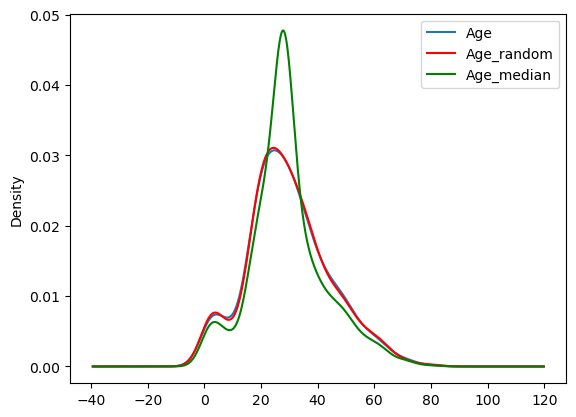

In [44]:
# Presentation
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='red')
df.Age_median.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
# The distribution looks almost similar to the age 
# kde - kernel density estimator
# Distorsion is not happening
# whether we should go with mean median imputaion or random imputation
# Definetly random imputaion

#  now the disadvantage of of mean/ median will be the advantage of random sample imputation
#  Advantage
1. Easy to implement 
2. There is less distortion in variance (distortion: change in 2 line in graph)

# Disadvantage
1. Every situation randomness won't work

# 3. Capturing NAN value with a new feature

In [23]:
import pandas as pd
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
# Create a new column and replace the value with 1 and 0  where ever there is null value
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [26]:
df.Age.mean()

29.69911764705882

In [27]:
df.Age.median()

28.0

In [28]:
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [29]:
# fill the null value of age with median
df['Age'].fillna(df.Age.median(),inplace=True)
# inplace for permanent 
# Model will see where ever there is 1 , the missing values are replaced by some other value

In [30]:
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0



# Advantages

1. Easy to Implement
2. Captures the importance of missing values 

# Disadvantage

1. Creating Additional Features (Curse of dimensionality)




# 4. End of Distribution imputation
I will try to take the end of distrituion and try to replace it

In [32]:
import pandas as pd
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

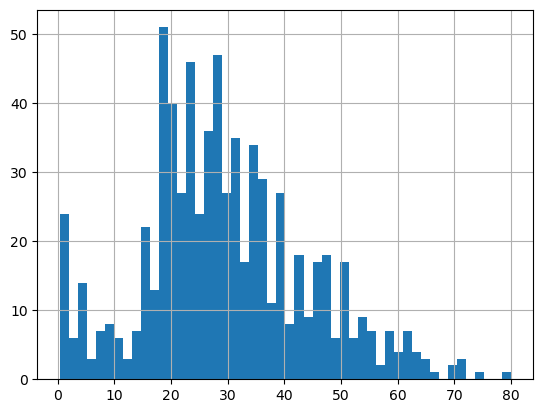

In [34]:
# Histogram
df.Age.hist(bins=50)

In [35]:
# I will take the far end of this distribution (60-70 range) and try to replace with some value
# central value
df.Age.mean()

29.69911764705882

In [41]:
3*df.Age.std()

43.57949199700213

In [42]:
# In normal ditribution , I will be taking after the third standard deviation
# After the third standard distribution the end of the disribution data that I am picking is basically 73.27
Extreme_variable=df.Age.mean()+3*df.Age.std()
df.Age.mean()+3*df.Age.std() # After the third standard deviation

73.27860964406095

<Axes: xlabel='Age'>

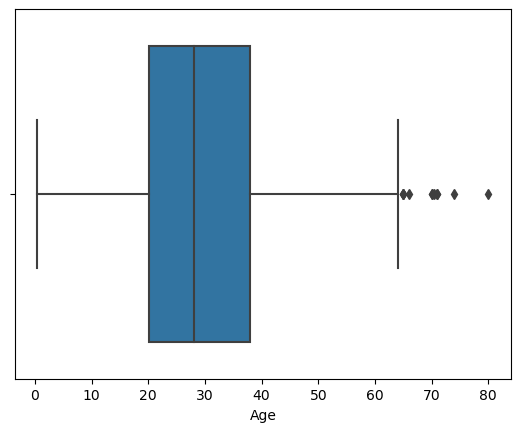

In [43]:
# check outliers
import seaborn as sns
sns.boxplot(x='Age',data=df)
# In our dataset we donnot have left side outlier , we have only right side outliers

In [60]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [46]:
def impute_nan(df,variable,median,Extreme_variable):
    df[variable+'_end_distribution']=df[variable].fillna(Extreme_variable)  # fill with extreme  value
    df[variable].fillna(median,inplace=True) # Replace the nan value with median value in age column
    
    

In [47]:
df.Age.median()

28.0

In [48]:
impute_nan(df,'Age',df.Age.median(),Extreme_variable)

In [49]:
df

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


<Axes: >

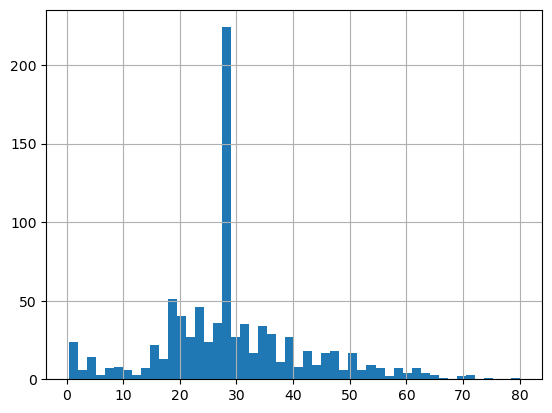

In [50]:
df['Age'].hist(bins=50) 
#Since I replaced all the nan value with median , now I am getting a variance 
# All the nan value are in centre , which are replaced by median
# more then 200+ nan value
# I have replaced with median

<Axes: >

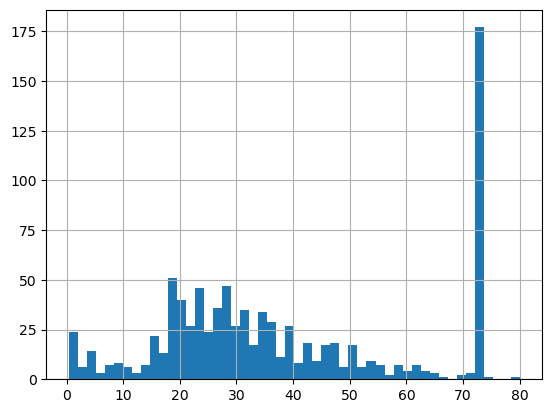

In [51]:
df['Age_end_distribution'].hist(bins=50)
# Last longer line 
# I have replaced with extreme value 

<Axes: xlabel='Age'>

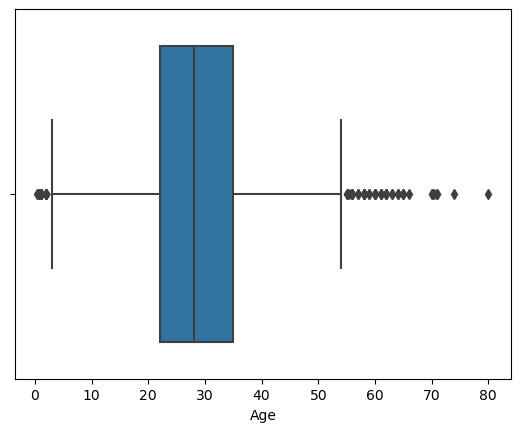

In [52]:
sns.boxplot(x='Age',data=df)
# It has so many outliers

<Axes: xlabel='Age_end_distribution'>

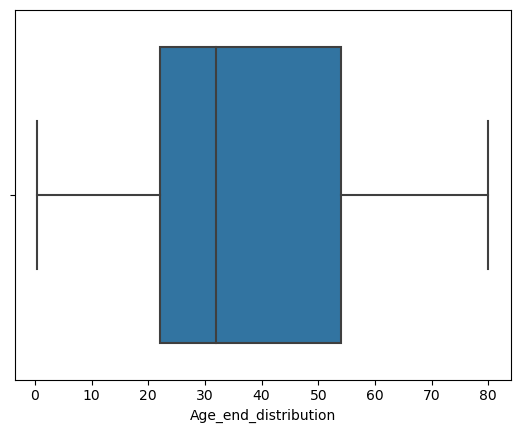

In [53]:
sns.boxplot(x='Age_end_distribution',data=df)
# No outliers

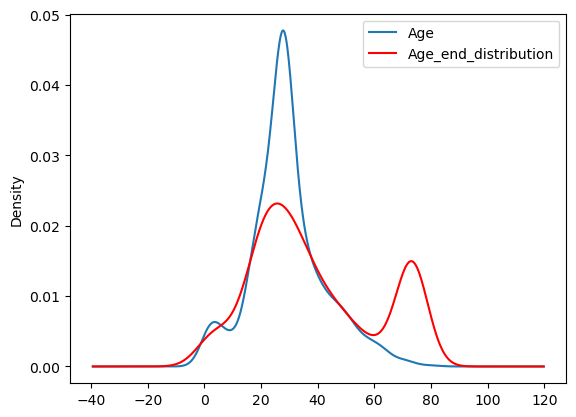

In [54]:
# Presentation
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_end_distribution.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Advantages
 
1. Easy to implement
2. Captures the importance of missingness if there is one

# Disadvantage

1. Distorts the original distribution of the variable
2. If missingness is not important , It may risk the predictive power of the original variable by distorting its distribition
3. If the number of NA is big , It will mask true outlies in the distribution
4. It the number of NA is small , the replaced NA may be considered an outliers and pre-processed in a subsequent step of feature engineering

